# Application of Machine Learning Techniques in Credit Card Fraud Detection

> **Random Forest**

**Random Forest** is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various **sub-samples of the dataset** and use **averaging** to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets import load_iris 
import warnings
warnings.filterwarnings('ignore')
from collections import Counter
print('All libraries imported')

All libraries imported


In [2]:
from pandas_profiling import ProfileReport

In [3]:
data = pd.read_csv('creditcard.csv')

In [1]:
#ProfileReport(data, title="Pandas Profiling Report")

# Data Pre-processing

## Data Standardization

Standardizing the features refers to rescaling the features so that they will have the properties of
a standard normal distribution with a mean of 0 and standard deviation of 1. I performed standardization on the 'Amount' feature using
StandardScalar in the scikit-learn library

### Before standardization

In [39]:
data['Amount']

0         149.62
1           2.69
2         378.66
3         123.50
4          69.99
           ...  
284802      0.77
284803     24.79
284804     67.88
284805     10.00
284806    217.00
Name: Amount, Length: 284807, dtype: float64

In [40]:
from sklearn.preprocessing import StandardScaler
data[['Amount']] = StandardScaler().fit_transform(data[['Amount']])

### After standardization

In [41]:
data['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

## Data Splittig using Random seed

A random seed is used to ensure the same data split each time the code is excecuted.

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x = data.drop("Class", axis =1)
y = data[["Class"]]

In [44]:
x.shape

(284807, 30)

In [45]:
y.shape

(284807, 1)

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42) # x = features, y = target

In [47]:
x_train.shape

(199364, 30)

In [48]:
y_train.shape

(199364, 1)

In [49]:
x_test.shape

(85443, 30)

In [50]:
y_test.shape

(85443, 1)

## Data Resampling

The dataset is highly unbalanced. To tackle this problem, I used resampling techniques such as: <br>

-  **Random Undersampling**
-  **Random Oversampling** .
-  **SMOTE**  <br>
-  **Under-Sampling: Tomek Links Removal**  
-  **Combination of SMOTE and undersampling**<br>

Implemented these on the training data separately to make it balanced <br>

However as a control we will run the model first with no resmapling techiniques and ananlyze the results, this will be done with the other algorithms. 


## 1. Random Forest with no Resampling

## Hyper parameter search for Logistic Regression

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.svm import SVC

In [56]:
rfc = RandomForestClassifier(random_state = 42)

In [57]:
random_params = { 
    'n_estimators': [200, 300, 400, 500, 600],
    'max_features': ['auto', 'sqrt', 'log2'],
}

In [58]:
clf = GridSearchCV(rfc, param_grid = random_params, cv = 10, scoring ='accuracy')

In [60]:
rnd_search = RandomizedSearchCV(rfc, random_params, cv = 10, scoring = 'accuracy')

In [21]:
clf.fit(x_train, y_train)

In [21]:
print(clf.best_params_)

{'max_features': 'log2', 'n_estimators': 400}


### Fitting the model

In [24]:
classifier1 = RandomForestClassifier(max_features = 'log2', n_estimators = 400)
model1 = classifier1.fit(x_train, y_train)

#params = model1.get_params()
#params

## Evaluation

In [30]:
from sklearn.metrics import accuracy_score

In [32]:
prediction1 = model1.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction1))

Accuracy Score:  0.9996137776061234


### Confusion Matrix

In [33]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix

In [34]:
confusion_matrix(y_test, prediction1)

array([[85301,     6],
       [   27,   109]], dtype=int64)

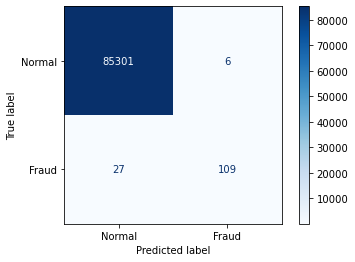

In [35]:
plot_confusion_matrix(model1, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [74]:
from sklearn.metrics import classification_report

In [37]:
print(classification_report(y_test, prediction1, digits=4)) 

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9478    0.8015    0.8685       136

    accuracy                         0.9996     85443
   macro avg     0.9738    0.9007    0.9342     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision-Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

In [39]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction1)

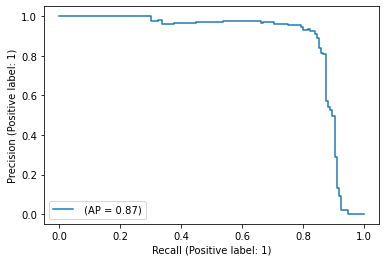

In [40]:
plot_precision_recall_curve(model1, x_test, y_test, name = '')
plt.show()

Area Under Precision Recall Curve = 0.87

### Reciever Operating Characteristic Curve (ROC)

In [34]:
from sklearn.metrics import plot_roc_curve, roc_curve

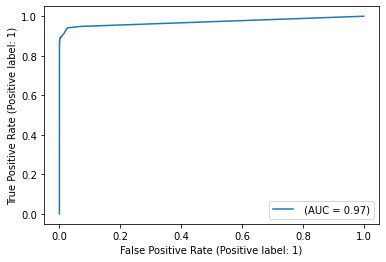

In [37]:
plot_roc_curve(model1, x_test, y_test, name = '')
plt.show()

Area under ROC (AUROC)  = 0.97

# 2. Random Forest with Random Under Sampling

In [38]:
from imblearn import under_sampling

In [39]:
from imblearn.under_sampling import RandomUnderSampler

In [46]:
rus = RandomUnderSampler()
x_under, y_under = rus.fit_resample(x_train, y_train)

In [47]:
x_under.shape

(712, 30)

In [45]:
y_under.shape

(712, 1)

In [48]:
y_under.Class.value_counts()

0    356
1    356
Name: Class, dtype: int64

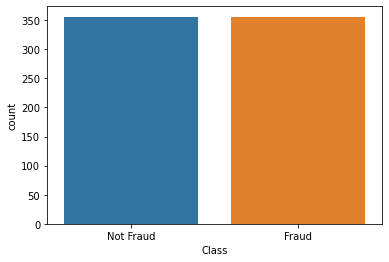

In [49]:
g = sns.countplot(y_under['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

Both majority and minority samples are now equal with 356 instances

### Parameter search 

Using the already created GridSearchCV, we will fit it with the new under sampled feature and target variables and find the best total tree and max features values from the initial list above

In [58]:
clf.fit(x_under, y_under)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='accuracy')

In [59]:
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


### Fitting the Model

In [60]:
classifier2 =RandomForestClassifier(max_features = 'auto', n_estimators = 200)
model2 = classifier2.fit(x_under, y_under)


### Evaluation

In [61]:
prediction2 = model2.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction2))

Accuracy Score:  0.9692777641234507


### Confusion Matrix

In [62]:
confusion_matrix(y_test, prediction2)

array([[82692,  2615],
       [   10,   126]], dtype=int64)

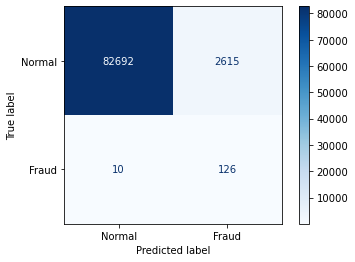

In [63]:
plot_confusion_matrix(model2, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [64]:
print(classification_report(y_test, prediction2, digits = 4))

              precision    recall  f1-score   support

           0     0.9999    0.9693    0.9844     85307
           1     0.0460    0.9265    0.0876       136

    accuracy                         0.9693     85443
   macro avg     0.5229    0.9479    0.5360     85443
weighted avg     0.9984    0.9693    0.9829     85443



### Precision-Recall Curve

In [65]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction2)

In [66]:
precision

array([0.0015917 , 0.04596862, 1.        ])

In [67]:
recall

array([1.        , 0.92647059, 0.        ])

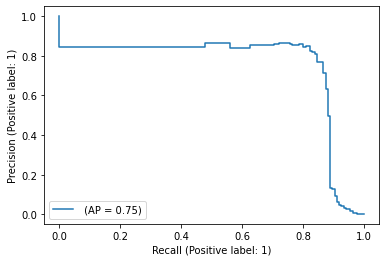

In [68]:
plot_precision_recall_curve(model2, x_test, y_test, name = '')
plt.show()

Area Under Precision Recall Curve = 0.75

### Reciever Operating Characteristic Curve (ROC)

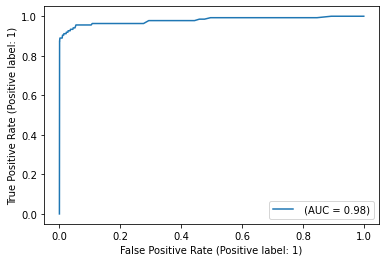

In [69]:
plot_roc_curve(model2, x_test, y_test, name = '')
plt.show()

Area under ROC (AUROC)  = 0.98

# 3. Random Forest with Random Over Sampling

In [44]:
from imblearn.over_sampling import RandomOverSampler

In [45]:
ros = RandomOverSampler(random_state = 0)
x_over, y_over = ros.fit_resample(x_train,y_train)

In [46]:
x_over.shape

(398016, 30)

In [47]:
y_over.shape

(398016, 1)

In [48]:
y_over.Class.value_counts()

0    199008
1    199008
Name: Class, dtype: int64

In [49]:
y_train.Class.value_counts()

0    199008
1       356
Name: Class, dtype: int64

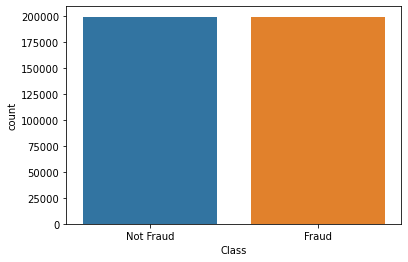

In [50]:
g = sns.countplot(y_over['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter Search

In [80]:
clf.fit(x_over, y_over)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500]},
             scoring='accuracy')

In [81]:
print(clf.best_params_)

{'max_features': 'auto', 'n_estimators': 200}


### Fitting the model

In [51]:
classifier3 = RandomForestClassifier(max_features ='auto', n_estimators =  200)
model3 = classifier3.fit(x_over, y_over)

### Evaluation

In [52]:
prediction3 = model3.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction3))

Accuracy Score:  0.9996254813150287


### Confusion Matrix 

In [53]:
confusion_matrix(y_test, prediction3)

array([[85302,     5],
       [   27,   109]], dtype=int64)

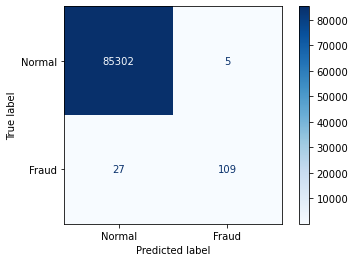

In [54]:
plot_confusion_matrix(model3, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification report

In [55]:
print(classification_report(y_test, prediction3, digits = 4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9561    0.8015    0.8720       136

    accuracy                         0.9996     85443
   macro avg     0.9779    0.9007    0.9359     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision-Recall Curve

In [59]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction3)

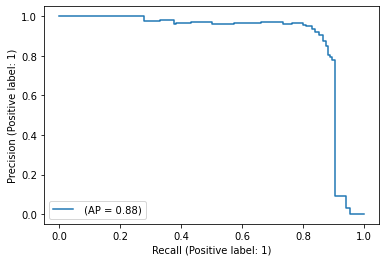

In [60]:
plot_precision_recall_curve(model3, x_test, y_test, name = '')
plt.show()

Area Under Precsion-Recall Curve = 0.88

### Reciever Operating Characteristic Curve (ROC)

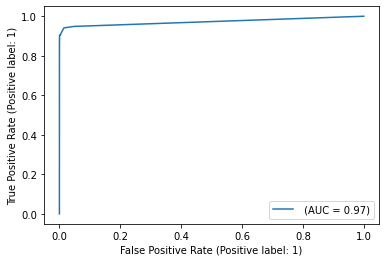

In [92]:
plot_roc_curve(model3, x_test, y_test, name = '')
plt.show()

AUROC = 0.97

# 4. Random Forest with Synthetic Minority Oversampling Technique SMOTE 

In [23]:
from imblearn.over_sampling import SMOTE 

In [19]:
smt = SMOTE(random_state = 0)

# fit predictor and target variable
x_train_SMOTE, y_train_SMOTE = smt.fit_resample(x_train, y_train)
print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_train_SMOTE.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    199008
1    199008
Name: Class, dtype: int64


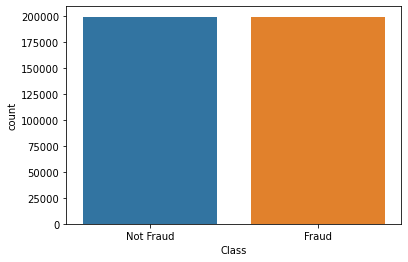

In [24]:
g = sns.countplot(y_train_SMOTE['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

### Parameter search

In [ ]:
%time clf.fit(x_train_SMOTE, y_train_SMOTE)

In [ ]:
print(clf.best_params_)

### Fitting the model

In [28]:
classifier4 = RandomForestClassifier(n_estimators = 550, max_features = 'auto')
model4 = classifier4.fit(x_train_SMOTE, y_train_SMOTE)

### Evaluation

In [31]:
prediction4 = model4.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction4))

Accuracy Score:  0.9994850368081645


### Confusion Matrix

In [32]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
#confusion_matrix(y_test, prediction1)

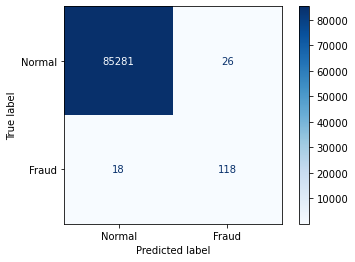

In [33]:
plot_confusion_matrix(model4, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [46]:
print(classification_report(y_test, prediction4, digits = 4))

              precision    recall  f1-score   support

           0     0.9998    0.9997    0.9998     85307
           1     0.8264    0.8750    0.8500       136

    accuracy                         0.9995     85443
   macro avg     0.9131    0.9374    0.9249     85443
weighted avg     0.9995    0.9995    0.9995     85443



### Precision-Recall Curve

In [47]:
precision, recall, thresholds = precision_recall_curve(y_test, prediction4)

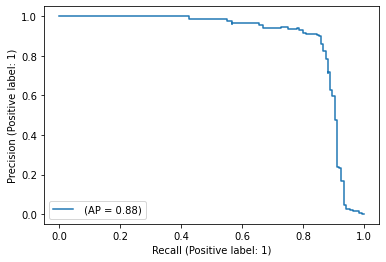

In [48]:
plot_precision_recall_curve(model4, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve (ROC)

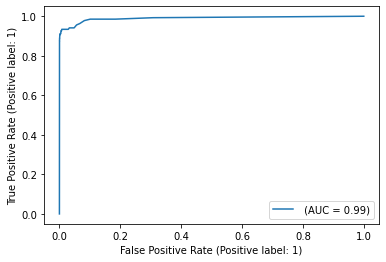

In [51]:
plot_roc_curve(model4, x_test, y_test, name = '')
plt.show()

In [35]:
plot_roc_curve?

# 5. Random Forest with Tomek links removal 

In [61]:
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import RandomizedSearchCV

In [62]:
t1 = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
x_t1, y_t1 = t1.fit_resample(x_train, y_train)

print('Original dataset shape for y  \n', y.Class.value_counts())
print('Resample dataset shape for y \n', y_t1.Class.value_counts())

Original dataset shape for y  
 0    284315
1       492
Name: Class, dtype: int64
Resample dataset shape for y 
 0    198995
1       356
Name: Class, dtype: int64


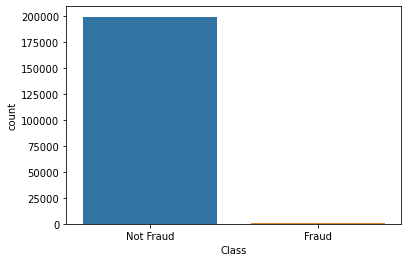

In [66]:
g = sns.countplot(y_t1['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [67]:
rnd_search.fit(x_t1,y_t1)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600]},
                   scoring='accuracy')

In [68]:
print(rnd_search.best_params_)

{'n_estimators': 500, 'max_features': 'log2'}


### Fitting the model

In [69]:
classifier5 = RandomForestClassifier(n_estimators = 500, max_features = 'log2')
model5 = classifier5.fit(x_t1, y_t1)

### Evaluation

In [70]:
prediction5 = model5.predict(x_test)
print ('Accuracy Score: ', accuracy_score(y_test, prediction5))

Accuracy Score:  0.9996137776061234


### Confusion Matrix

In [71]:
confusion_matrix(y_test, prediction5)

array([[85299,     8],
       [   25,   111]], dtype=int64)

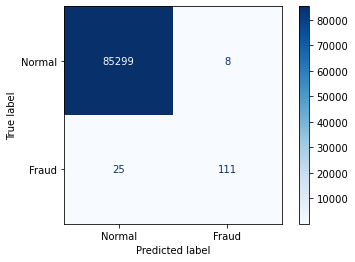

In [72]:
plot_confusion_matrix(model5, x_test, y_test, cmap = 'Blues', display_labels = ['Normal', 'Fraud'])

### Classification Report

In [75]:
print(classification_report(y_test, prediction5, digits = 4))

              precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     85307
           1     0.9328    0.8162    0.8706       136

    accuracy                         0.9996     85443
   macro avg     0.9662    0.9080    0.9352     85443
weighted avg     0.9996    0.9996    0.9996     85443



### Precision Recall Curve

In [79]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

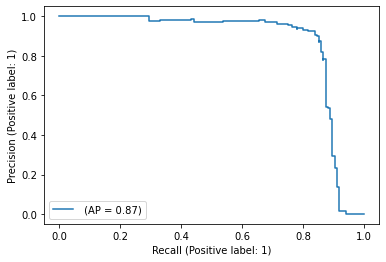

In [80]:
plot_precision_recall_curve(model5, x_test, y_test, name = '')
plt.show()

### Reciever Operating Characteristic Curve

In [77]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

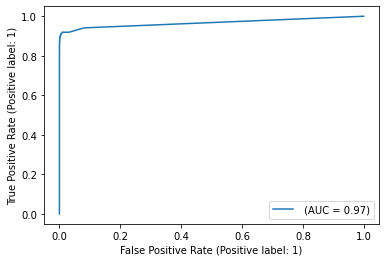

In [78]:
plot_roc_curve(model5, x_test, y_test, name = '')
plt.show()
#plt.plot([0,1], [0,1], c='b')